In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/mammals.csv', index_col=0)
data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [3]:
data.describe()

,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
count,62.000000,62.000000,48.000000,50.000000,58.000000,58.000000,58.000000,62.000000,62.000000,62.000000
mean,198.789984,283.134194,8.672917,1.972000,10.532759,19.877586,142.353448,2.870968,2.419355,2.612903
std,899.158011,930.278942,3.666452,1.442651,4.606760,18.206255,146.805039,1.476414,1.604792,1.441252
min,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.600000,4.250000,6.250000,0.900000,8.050000,6.625000,35.750000,2.000000,1.000000,1.000000
50%,3.342500,17.250000,8.350000,1.800000,10.450000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,48.202500,166.000000,11.000000,2.550000,13.200000,27.750000,207.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


In [6]:
body_range = np.ptp(data.BodyWt)
body_range

6653.995

In [7]:
brain_range = np.ptp(data.BrainWt)
brain_range

5711.86

# Có khoảng cách lớn giữ max và min

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


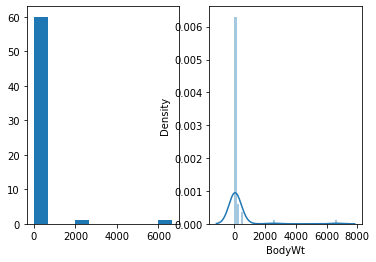

In [14]:
plt.subplot(1, 2, 1)
plt.hist(data.BodyWt)
plt.subplot(1, 2, 2)
sns.distplot(data.BodyWt)
plt.show()

In [15]:
data.BodyWt.skew() # phân phối lệch phải

6.563608062833757

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


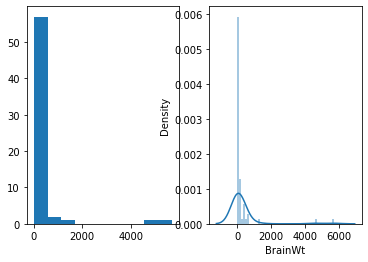

In [20]:
plt.subplot(1, 2, 1)
plt.hist(data.BrainWt)
plt.subplot(1, 2, 2)
sns.distplot(data.BrainWt)
plt.show()

In [21]:
data.BrainWt.skew() # phân phối lệch phải

5.071589456939673

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


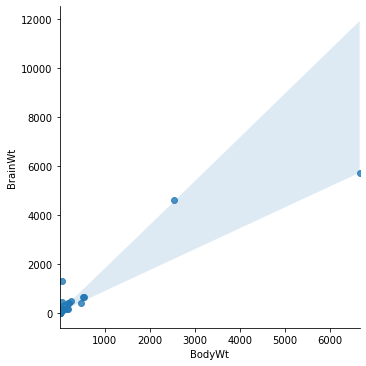

In [22]:
# Xem xét mối quan hệ
sns.lmplot(data=data, x='BodyWt', y='BrainWt')

### Quan hệ tuyến tính
### Chọn phương pháp chuẩn hóa là log normalization

In [23]:
data['BrainWt_log'] = np.log(data.BrainWt)
data['BodyWt_log'] = np.log(data.BodyWt)

data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,BrainWt_log,BodyWt_log
1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,8.650325,8.802973
2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,1.887070,0.000000
3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,3.795489,1.219354
4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,1.740466,-0.083382
5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,8.434464,7.842671


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


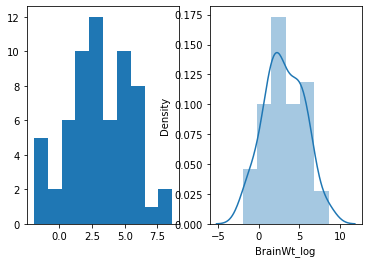

In [25]:
plt.subplot(1, 2, 1)
plt.hist(data.BrainWt_log)
plt.subplot(1, 2, 2)
sns.distplot(data.BrainWt_log)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


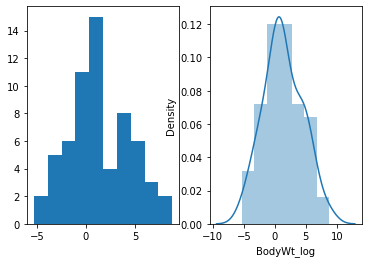

In [26]:
plt.subplot(1, 2, 1)
plt.hist(data.BodyWt_log)
plt.subplot(1, 2, 2)
sns.distplot(data.BodyWt_log)
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


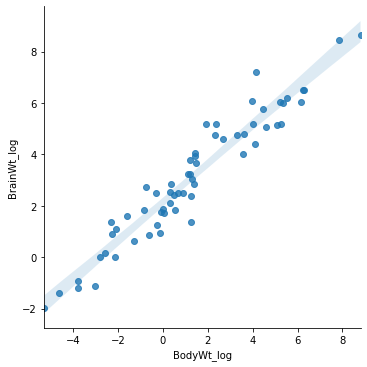

In [27]:
# Xem xét mối quan hệ
sns.lmplot(data=data, x='BodyWt_log', y='BrainWt_log')